# Lab 2: Recursion equations and differential equations

## 1. Recursion equations

### 1.1 Exponential growth in discrete time

A simple way to write the recursion equation for exponential growth, $n(t) = n(t-1) R$, is to define a function that gives the initial population size, $n_0$ when $t=0$ and otherwise gives the population size at the previous time, $n(t-1)$, multiplied by the growth rate, $R$. 

In [19]:
def n(t, n0, R):
    if t==0:
        return n0 #initial condition (population size of n0 at time 0)
    else:
        return n(t-1, n0, R) * R #recursion (multiply the previous population size by R)

So then if we wanted the population size at time $t=5$, with initial population size $n_0=1$ and growth rate $R=2$, we could evaluate

In [17]:
n(t=5, n0=1, R=2)

32

Note that this is not always the smartest way to write a recursion. This is because everytime we evaluate $n(t)$ at some time $t$ we first calculate $n(0)$, then $n(1)$, then $n(2)$, ... until we get to $n(t)$. So if we wanted to plot $n(t)$ as a function of $t$, we'd do this recursion down to $t=0$ for every value of $t$! 

### 1.2 Functions vs generators

We might therefore rather define a "function" that will store the current value of the function to easily give the next. Below is one

In [40]:
def n(t0, n0, R, max=Infinity):
    t = t0 #set the initial value of t
    nt = n0 #and the initial value of n(t)
    while t <= max: #and then if we've not gone too far yet
        yield nt #yield the current value of n(t)
        t += 1 #then update t (this is equivalent to t = t + 1)
        nt = nt * R #and update n(t)

This is called a "generator", and the subtle difference between a generator and function is mostly being whether we "return" or "yield" values. The "yield" returns the value but then stops evaluating further, until the generator is called again.

So let's choose some parameter values and make a specific generator, which can give us $n(t)$ for $t=0,1,...,10$ with parameter values $n_0=1$ and $R=2$

In [36]:
nt = n(t0=0, n0=1, R=2, max=10)

Now we can ask what the next value of n is (this will be the initial value, $n_0$)

In [37]:
next(nt)

1

And the next

In [38]:
next(nt)

2

And so on. We can also ask for all the values in our generator by asking "for" each value "in" the generator

In [39]:
nt = n(t0=0, n0=1, R=2, max=10)
[n for n in nt]

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

### 1.3 Logistic growth in discrete time

Write the recursion equation for logistic growth, $n(t) = n(t) + r n(t-1) (1 - n(t-1)/k)$, as a generator

In [158]:
def n(n0, r, k, max=Infinity):
    t = 0
    nt = n0
    while t <= max:
        yield nt
        t += 1
        nt += r * nt * (1 - nt / k)

Set the initial population size to 1, growth rate $r$ to 0.1, and carrying capacity $k$ to 100.

Make a list of the population sizes from $t=0$ to $t=100$.

In [159]:
nt = n(n0=1, r=0.1, k=100, max=100)
ns = [n for n in nt]

What is the population size at $t=100$?

In [160]:
ns[-1], ns[100]

(99.5724456705186, 99.5724456705186)

Now make a list of the pair [t,n(t)] from $t=0$ to $t=100$

In [161]:
nt = n(n0=1, r=0.1, k=100, max=100)
xys = [[t, next(nt)] for t in range(0,100)]

Use ```scatter_plot()``` to plot these population sizes as a function of time

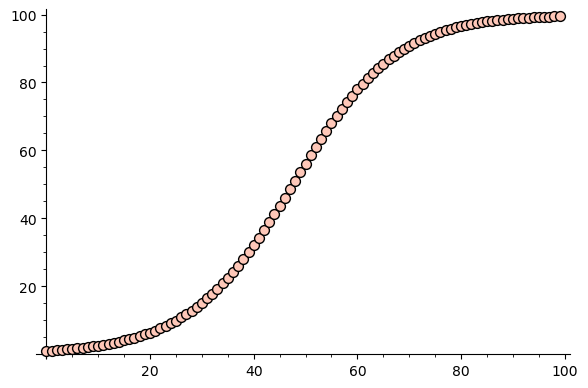

In [162]:
scatter_plot(xys)

Now plot this for $r$ values 0.1, 2.1, 2.5, 2.565, 2.7, and 3.1. What are you seeing?

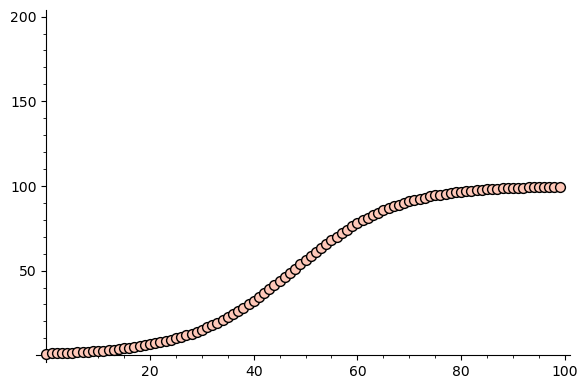

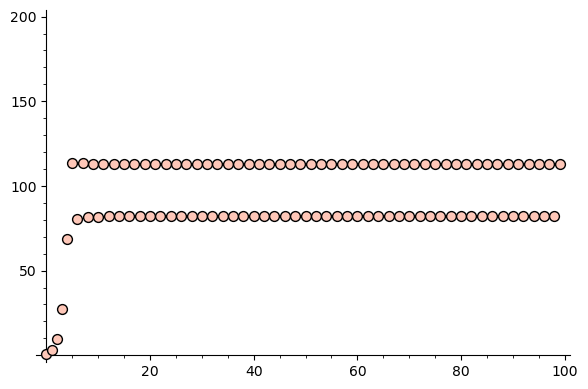

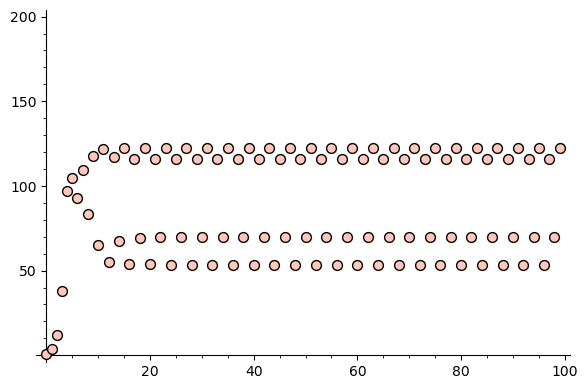

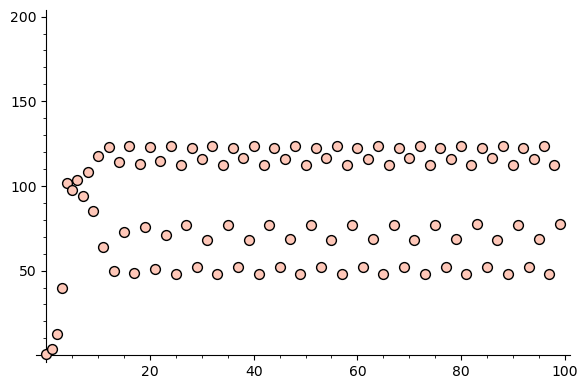

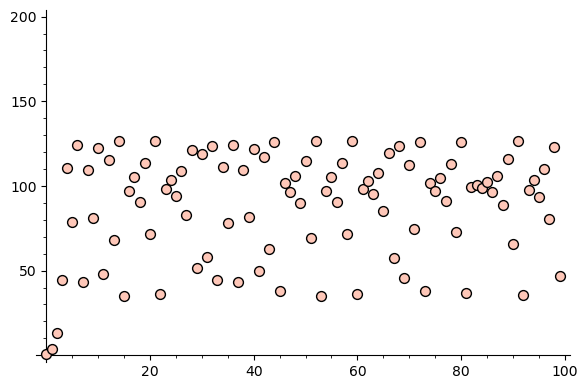

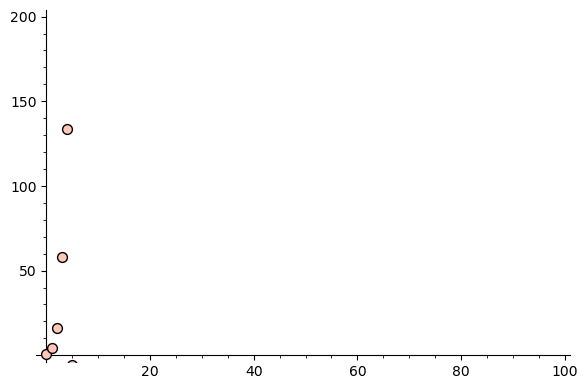

In [75]:
for r in [0.1, 2.1, 2.5, 2.565, 2.7, 3.1]:
    nt = n(n0=1, r=r, k=100, max=100)
    xys = [[t, next(nt)] for t in range(0,100)]
    show(scatter_plot(xys, ymin=0, ymax=200))

We can make a bifurcation diagram to see what is happening to the final population size as we increase $r$

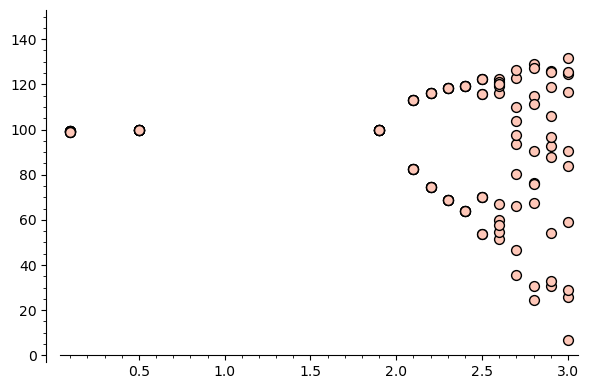

In [127]:
equils = [] #an empty list where we'll put some values
for r in [0.1, 0.5, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]: #a list of r values to try
    nt = n(n0=1, r=r, k=100, max=100) #make the generator
    xys = [[r, next(nt)] for _ in range(0,100)] #get the population sizes from t=0 to t=100 (and the associated value of r)
    for t in range(0,10): #append the last 10 values to our list
        equils.append(xys[-t-1])
        
scatter_plot(equils, ymin=0, ymax=150) #plot the final values as a function of r

## 2. Differential equations

Differential equations lend themselves less to simulation since they are a limit of the recursion equation as the time step goes to 0. However, we could generalize our approach above to update the population size over any increment of time. For example, below we update population size under exponential growth in increments of ```dt```

In [202]:
def n(dt, n0, R, max=Infinity):
    t = 0 #set the initial value of t
    nt = n0 #and the initial value of n(t)
    while t <= max: #and then if we've not gone too far yet
        yield t, nt #yield the current value of n(t)
        t += dt #then update t (this is equivalent to t = t + dt)
        nt += nt * R * dt #and update n(t)

Now we can compare the values we get for small values of ```dt``` (say 0.01) to the discrete case above (```dt```=1)

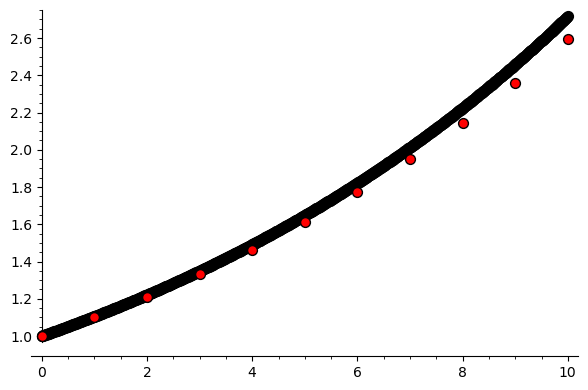

In [205]:
nt = n(0.01, 1, 0.1, max=10) #small dt=0.01, approximating continuous time
nts_c = [[t,n] for t,n in nt]

nt = n(1, 1, 0.1, max=10) #dt=1, discrete time
nts_d = [[t,n] for t,n in nt]

show(
    scatter_plot(nts_c, facecolor='k') + #continuous in black
    scatter_plot(nts_d, facecolor='r') #discrete in red
)

SageMath also has the ability to solve differential equations, but we won't spend much time on this as we will be able to do this for very few models

In [136]:
r,k=var('r,k')
f(n) = r * n * (1 - n / k)

In [156]:
r,k,t,n0 = var('r,k,t,n0') #define the variables
n = function('n')(t) #define the function

f = desolve(
    diff(n(t),t) == r * n(t) * (1 - n(t) / k), #the differential equation we want to solve
    n(t), #the function we want to solve for
    ivar = t, #the independent variable we want the function to be of
    ics = [0,n0] #the initial conditions (t0, n0)
)
show(f)

-(log(-k + n(t)) - log(n(t)))/r == (r*t - log(-k + n0) + log(n0))/r